# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

/var/folders/r8/9k7jk6mn4yd80b3zpgv05n380000gn/T/ipykernel_81976/3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


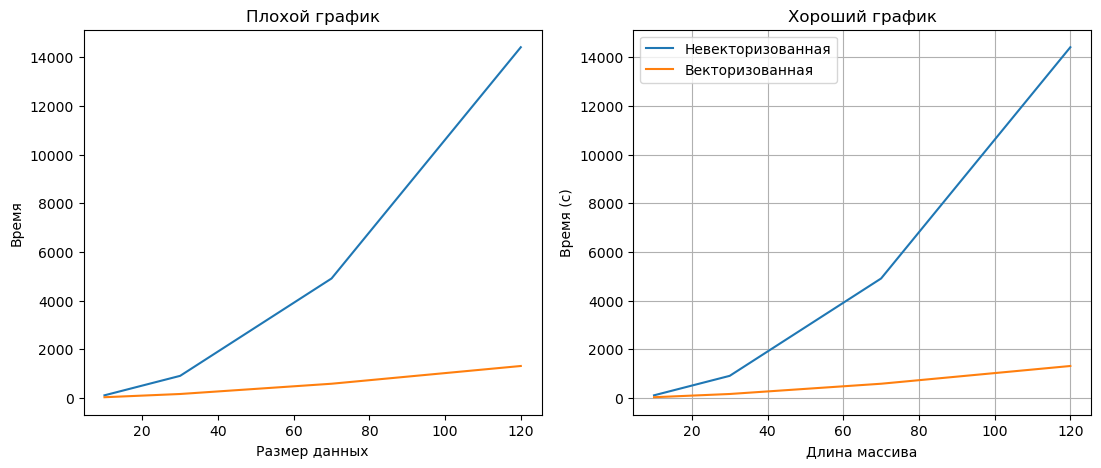

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [6]:
def prod_non_zero_diag(a):
    ans = 1

    n = len(a) - 1
    m = len(a[0]) - 1

    x = 0
    y = 0

    while (x <= n and y <= m):
        if (a[x][y] != 0):
            ans *= a[x][y]
        x += 1
        y += 1


    return ans

In [7]:
def prod_non_zero_diag_vect(a):
    return np.prod(np.diag(a)[np.diag(a)!=0])

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [8]:
def are_multisets_equal(a, b):
    if(len(a) != len(b)):
        return False
    a.sort()
    b.sort()
    for i in range(len(a)):
        if(a[i] != b[i]):
            return False
    return True

In [9]:
def are_multisets_equal_vect(a, b):
    if (len(a) != len(b)):
        return False
    return np.all(np.sort(a)==np.sort(b))

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [10]:
def max_after_zero(a):
    mx = -1
    for i in range(1, len(a)):
        if (a[i - 1] == 0 and a[i] > mx):
            mx = a[i]

    return mx

In [11]:
def max_after_zero_vect(a):
    return (a[1:][(a==0)[:-1]])

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [12]:
def convert_image(img, coefs):
    n = len(img)
    m = len(img[0])
    res = list()
    for i in range(n):
        h = list()
        for j in range(m):
            h.append(0)
            for k in range(len(coefs)):
                h[-1] += img[i][j][k] * coefs[k]
        res.append(h)
            
    return img

In [13]:
def convert_image_vect(img, coefs):
    return np.sum(img * coeff, axis=-1)

/var/folders/r8/9k7jk6mn4yd80b3zpgv05n380000gn/T/ipykernel_81976/2429629850.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


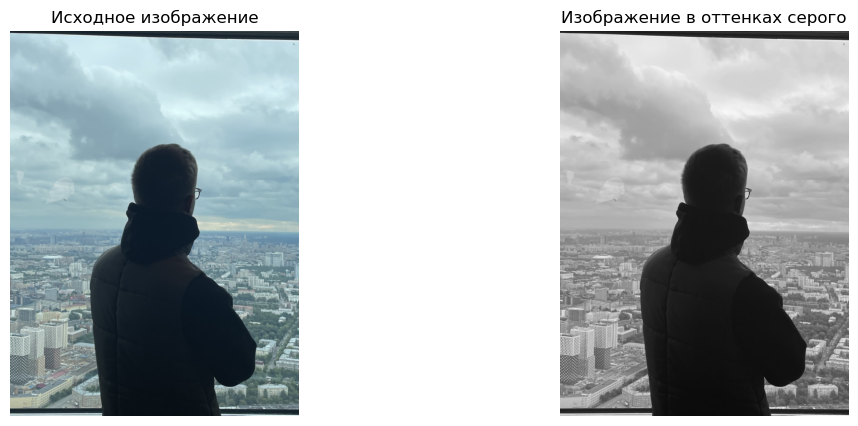

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import numpy as np

%matplotlib inline

img = imread('/Users/aleksandrmoskvin/Desktop/task-2/98125B95-96AD-4590-9EE4-D1D7EF093D82_1_105_c.jpeg')
coeff = np.array([0.299, 0.587, 0.114])
img_grey = convert_image_vect(img, coeff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')
ax2.imshow(img_grey, cmap='gray')
ax2.set_title('Изображение в оттенках серого')
ax2.axis('off')

fig.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [16]:
def run_length_encoding(a):
    d = dict()

    for i in a:
        if (i not in d.keys()):
            d[i] = 1
        else:
            d[i] += 1

    res = ([], [])

    for i in list(d.keys()):
        res[0].append(i)
        res[1].append(d[i])

    return res

In [17]:
def run_length_encoding_vect(a):
    y = np.hstack((np.ones(1),a[:- 1]))
    first_positions = a != y
    first_positions[0] = True
    indexes_1 = np.arange(np.size(a))[first_positions]
    indexes_2 = np.hstack((indexes_1[1:], np.array([np.size(a)])))
    return a[first_positions], indexes_2 - indexes_1

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [18]:
def pairwise_distance(a, b):
    n = len(a)
    m = len(a[0])
    c = []
    for i in range(n):
        c.append([0] * m)

    for i in range(0, n):
        for j in range(0, m):
            c[i][j] = ((a[i][0] - b[j][0])**2 + (a[i][1] - b[j][1])**2)**0.5

    return c

In [19]:
def pairwise_distance_vect(a, b):
    return np.sqrt(np.sum((a[:, np.newaxis] - b) ** 2, axis=-1))

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [21]:
data_size_1 = [x for x in range(10, 150, 20)]
vect_list_1 = list()
non_vect_list_1 = list()

for size in data_size_1:
    X = np.random.randint(-2, 2, (size, size))
    vect_time = %timeit -o prod_non_zero_diag_vect(X)
    non_vect_time = %timeit -o prod_non_zero_diag(X)
    vect_list_1.append(vect_time.average * 1000000)
    non_vect_list_1.append(non_vect_time.average * 1000000)

3.13 µs ± 13.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.01 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.17 µs ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.95 µs ± 55.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.2 µs ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.2 µs ± 35 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.26 µs ± 29.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
14.5 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.31 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
18 µs ± 231 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.42 µs ± 47.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
22 µs ± 58.1 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.41 µs ± 13.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
27.1 µs ± 79.1 ns per

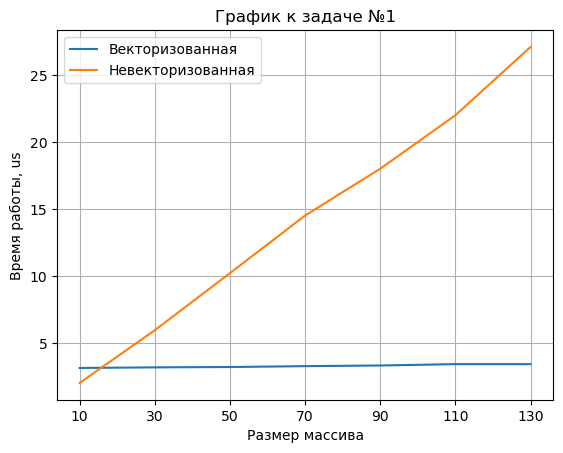

In [22]:
plt.plot(data_size_1, vect_list_1, label=u"Векторизованная")
plt.plot(data_size_1, non_vect_list_1, label=u"Невекторизованная")
plt.xticks(data_size_1)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №1')
plt.grid(True)
plt.legend()

plt.show()

In [23]:
data_size_2 = [x for x in range(1000, 10000, 1000)]    
vect_list_2 = list()
non_vect_list_2 = list()

for size in data_size_2:
    x = np.random.randint(-10, 10, (size))
    y = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o are_multisets_equal_vect(x, y)
    non_vect_time = %timeit -o are_multisets_equal(x, y)
    vect_list_2.append(vect_time.average * 1000000)
    non_vect_list_2.append(non_vect_time.average * 1000000)

10 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.7 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
23.5 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
21.4 µs ± 539 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
51.9 µs ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
34.6 µs ± 753 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
82.8 µs ± 5.84 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
46.2 µs ± 932 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
125 µs ± 7.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
59.1 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
156 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
73.6 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
190 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
88.5 µs ± 1.23 µs per loop (mean ±

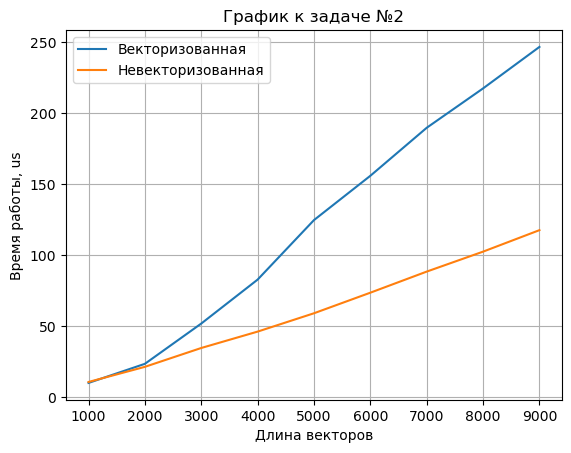

In [24]:
plt.plot(data_size_2, vect_list_2, label=u"Векторизованная")
plt.plot(data_size_2, non_vect_list_2, label=u"Невекторизованная")
plt.xticks(data_size_2)
plt.xlabel(u'Длина векторов')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №2')
plt.grid(True)
plt.legend()

plt.show()

In [25]:
data_size_3 = [x for x in range(1000, 10000, 1000)]    
vect_list_3 = list()
non_vect_list_3 = list()

for size in data_size_3:
    x = np.random.randint(-10, 10, (size))
    vect_time = %timeit -o max_after_zero_vect(x)
    non_vect_time = %timeit -o max_after_zero(x)
    vect_list_3.append(vect_time.average * 1000000)
    non_vect_list_3.append(non_vect_time.average * 1000000)

1.37 µs ± 12.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
64.6 µs ± 475 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.86 µs ± 8.34 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
129 µs ± 687 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.34 µs ± 7.79 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
197 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.85 µs ± 3.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
258 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.3 µs ± 9.28 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
324 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.61 µs ± 5.78 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
390 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.11 µs ± 12.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
454 µs ± 4.1 µs per loop (

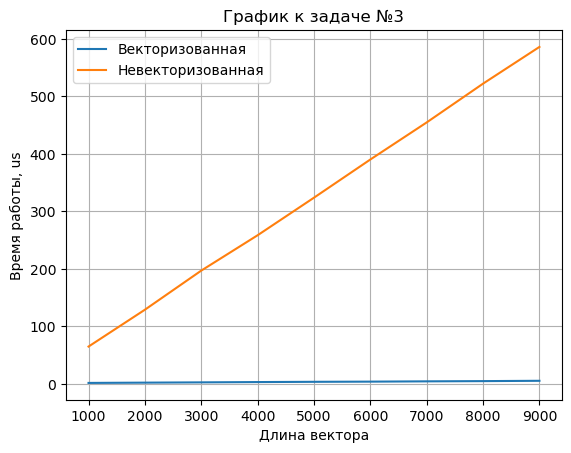

In [26]:
plt.plot(data_size_3, vect_list_3, label=u"Векторизованная")
plt.plot(data_size_3, non_vect_list_3, label=u"Невекторизованная")
plt.xticks(data_size_3)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, us')
plt.title(u'График к задаче №3')
plt.grid(True)
plt.legend()

plt.show()

In [28]:
data_size_4 = [x for x in range(10, 150, 20)]    
vect_list_4 = list()
non_vect_list_4 = list()

for size in data_size_4:
    img = np.random.randint(-2, 2, (size, size, 3))
    coeff = np.random.random(3)
    vect_time = %timeit -o convert_image_vect(img, coeff)
    non_vect_time = %timeit -o convert_image(img, coeff)
    vect_list_4.append(vect_time.average * 1000)
    non_vect_list_4.append(non_vect_time.average * 1000)

3.62 µs ± 9.15 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
105 µs ± 677 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.2 µs ± 583 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
917 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
39.2 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.52 ms ± 9.63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
70.5 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.89 ms ± 8.12 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
118 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
8.19 ms ± 51 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
182 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
11.9 ms ± 43.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
256 µs ± 5.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
16.9 ms ± 265 µs per loop (mean ± std. dev. of

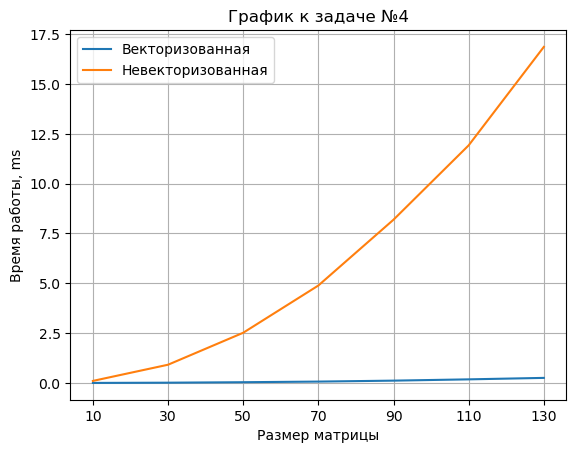

In [29]:
plt.plot(data_size_4, vect_list_4, label=u"Векторизованная")
plt.plot(data_size_4, non_vect_list_4, label=u"Невекторизованная")
plt.xticks(data_size_4)
plt.xlabel(u'Размер матрицы')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №4')
plt.grid(True)
plt.legend()

plt.show()

In [30]:
data_size_5 = [x for x in range(10, 1000, 100)]    
vect_list_5 = list()
non_vect_list_5 = list()

for size in data_size_5:
    x = np.random.randint(-5, 5, (size))
    vect_time = %timeit -o run_length_encoding_vect(x)
    non_vect_time = %timeit -o run_length_encoding(x)
    vect_list_5.append(vect_time.average * 1000000)
    non_vect_list_5.append(non_vect_time.average * 1000000)

5.54 µs ± 41.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.38 µs ± 3.85 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
5.74 µs ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11.5 µs ± 25.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.39 µs ± 24.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
22 µs ± 140 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
6.63 µs ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
32 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
6.96 µs ± 17.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
41.7 µs ± 65.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.24 µs ± 31.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
52.5 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.94 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
61.9 µs ± 174 ns per 

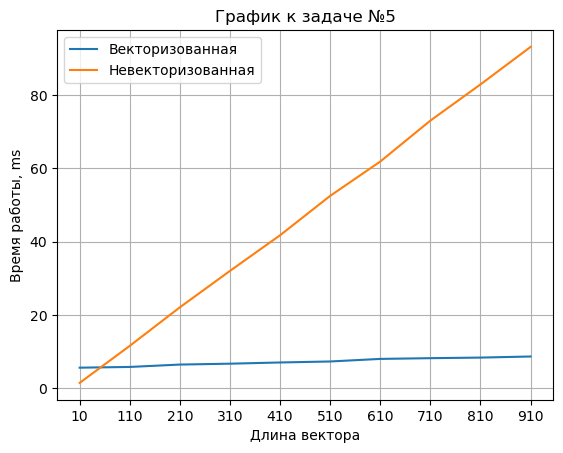

In [31]:
plt.plot(data_size_5, vect_list_5, label=u"Векторизованная")
plt.plot(data_size_5, non_vect_list_5, label=u"Невекторизованная")
plt.xticks(data_size_5)
plt.xlabel(u'Длина вектора')
plt.ylabel(u'Время работы, ms')
plt.title(u'График к задаче №5')
plt.grid(True)
plt.legend()

plt.show()

In [32]:
from scipy.spatial.distance import cdist

data_size_6 = [x for x in range(10, 150, 20)]  
vect_list_6 = list()
non_vect_list_6 = list()
cdist_list = list()

for size in data_size_6:
    X = np.random.randint(-5, 5, (size, size))
    Y = np.random.randint(-5, 5, (size, size))
    vect_time = %timeit -o pairwise_distance_vect(X, Y)
    non_vect_time = %timeit -o pairwise_distance(X, Y)
    cdist_time = %timeit -o cdist(X, Y, metric='euclidean')
    vect_list_6.append(vect_time.average * 1000)
    non_vect_list_6.append(non_vect_time.average * 1000)
    cdist_list.append(cdist_time.average * 1000)

4.99 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
115 µs ± 225 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.03 µs ± 12.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
36.7 µs ± 472 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.02 ms ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.04 µs ± 58.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
165 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.84 ms ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
33.2 µs ± 74.2 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
558 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.55 ms ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
94.7 µs ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.21 ms ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.19 ms ± 108 µs per loop (mean ± std. 

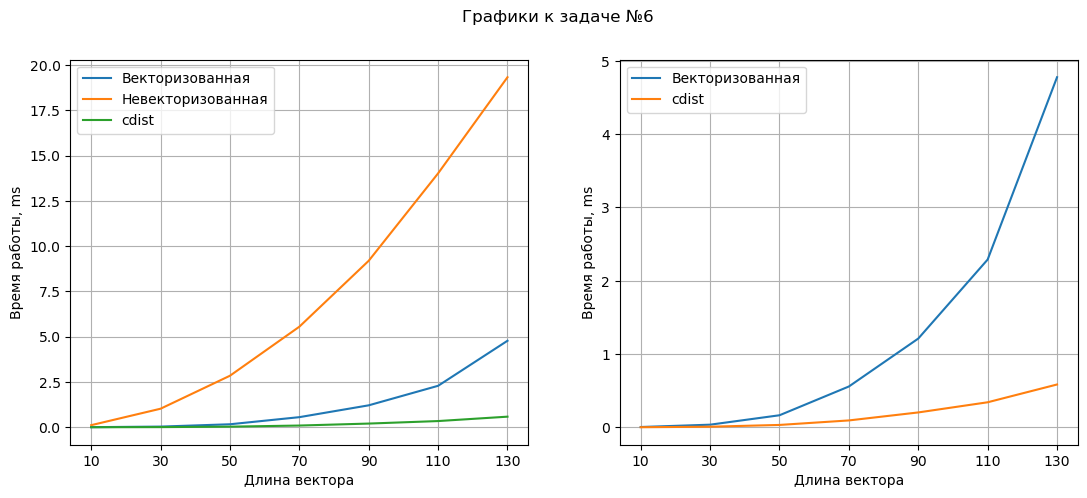

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

fig.suptitle('Графики к задаче №6')
ax1.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax1.plot(data_size_6, non_vect_list_6, label=u"Невекторизованная")
ax1.plot(data_size_6, cdist_list, label='cdist')
ax1.set_xticks(data_size_6)
ax1.set_xlabel(u'Длина вектора')
ax1.set_ylabel(u'Время работы, ms')
ax1.grid(True)
ax1.legend()

ax2.plot(data_size_6, vect_list_6, label=u"Векторизованная")
ax2.plot(data_size_6, cdist_list, label='cdist')
ax2.set_xticks(data_size_6)
ax2.set_xlabel(u'Длина вектора')
ax2.set_ylabel(u'Время работы, ms')
ax2.grid(True)
ax2.legend()


plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

***Рандомный текст***

~~Hello, world!~~

<u>My project</u>

> This is a quote

1. Python
2. C++
3. c#

- [x] This is True
- [ ] This is False